# Como rodar uma query SQL no R e obter a resposta como um DataFrame

In [ ]:
# chamar a biblioteca
library(bigrquery)

In [ ]:
#Defina a query
query <- "SELECT * FROM `hacka-dados.hacka_dados.tabela_dados_hacka` "

# Set o project id (verifique o seu com o mentor)
projectid <- "hacka-357618"

# Rode o comando abaixo. Isto deve retornar um objeto bq_table para poder fazer consultas nele
tb <- bq_project_query(projectid, query)

In [ ]:
# o comando abaixo retorna as 10 primeiras linhas
sample <-bq_table_download(tb, n_max = 10)


sample

ID,Capacidade_de_Pagamento_7,tempo_desde_primeiro_contrato,tempo_desde_ultimo_contrato,QTD_SEGURO,QTD_OUTROS,QTD_CP_CONSIGNADO,QTD_CDCCG,QTD_CONTA_DIGITAL,QTD_CARTAO,⋯,GC_OfertaNegociacao_3m,CD_Boleto_3m,CX_Cliente_NaoCompreende_3m,PL_Sem_Condicoes_3m,NV_DC10_Cliente_alega_pagamento_3m,NV_FC_NEGOCIACAO_COM_SUCESSO_3m,NV_BP4_Informa_o_desconto_3m,Duracao_segundos,fl_renovou,VrFinanciamento
<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
0,4,1267,251,5,0,0,1,0,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,-0.3236627
1,4,1797,236,4,0,0,1,0,0,⋯,NA,NA,NA,NA,NA,NA,NA,52,0,0.8825137
2,4,268,18,3,0,0,0,0,1,⋯,NA,NA,NA,NA,NA,NA,NA,81,0,-0.3854051
3,8,422,323,3,0,0,0,0,0,⋯,NA,NA,NA,NA,NA,NA,NA,97,0,-0.7070450
4,8,5073,252,3,0,0,0,0,0,⋯,NA,NA,NA,NA,NA,NA,NA,276,0,1.0351860
5,8,301,164,2,0,0,0,0,0,⋯,NA,NA,NA,NA,NA,NA,NA,193,0,0.9617166
6,8,242,238,1,0,0,0,0,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,-0.1145052
7,7,226,168,9,0,0,0,0,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,1.7684989
10,8,286,286,3,0,0,0,0,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,-1.1700000


### Trazendo a base completa
Para trazer a base completa precisamos quebrar em 2 partes

In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
#parte 1


query <- "SELECT * FROM `hacka-dados.hacka_dados.tabela_dados_hacka` where id <= 32000"
projectid <- "hacka-357618"
tb <- bq_project_query(projectid, query)
sample1 <-bq_table_download(tb, n_max = Inf)

#parte 2


query <- "SELECT * FROM `hacka-dados.hacka_dados.tabela_dados_hacka` where id > 32000"
projectid <- "hacka-357618"
tb <- bq_project_query(projectid, query)
sample2 <-bq_table_download(tb, n_max = Inf)

sample3 <- union_all(sample1, sample2)

In [ ]:
count(sample3)

________________________________

# Escrevendo um df no banco de dados

1) eh necessario um criar um schema ou utilizar um ja criado -- CREATE SCHEMA NOME;

2) Atualize a query abaixo, considerando nome_schema o nome do database que voce queira cria2) r

#@bigquery
create schema seu_schema options(location="us-central-1"); --sem []


create table `seu_schema.sua_base1` as
select * from `hacka-357618.dataset.view_dados_hacka`  --dataset original

______________________

# Como instalar uma lib 
No R, sao necessarios 2 passos: 1- instalar os pacotes e 2 - chama-los

In [ ]:
#instalando pacote partykit
install.packages('partykit')

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’




In [ ]:
#chamando pacote partykit
library('partykit')

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



# Como importar dados .csv externos
Suponha que o arquivo seja `50_Startups.csv`

In [ ]:
library(readr)


1) Selecione a aba File Browser
2) Suba o arquivo clicando na set para cima (Upload Files) ao lado do botao azul 
3) Selecione o arquivo 


In [ ]:
MyData <- as.data.frame(fread(file="50_Startups.csv",header=TRUE, sep = ','))

In [ ]:
head(MyData)

,R&D Spend,Administration,Marketing Spend,State,Profit
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,165349.2,136897.80,471784.1,New York,192261.8
2,162597.7,151377.59,443898.5,California,191792.1
3,153441.5,101145.55,407934.5,Florida,191050.4
4,144372.4,118671.85,383199.6,New York,182902.0
5,142107.3,91391.77,366168.4,Florida,166187.9
6,131876.9,99814.71,362861.4,New York,156991.1


# Salvando figuras no computador Local

In [ ]:
library(ggplot2)

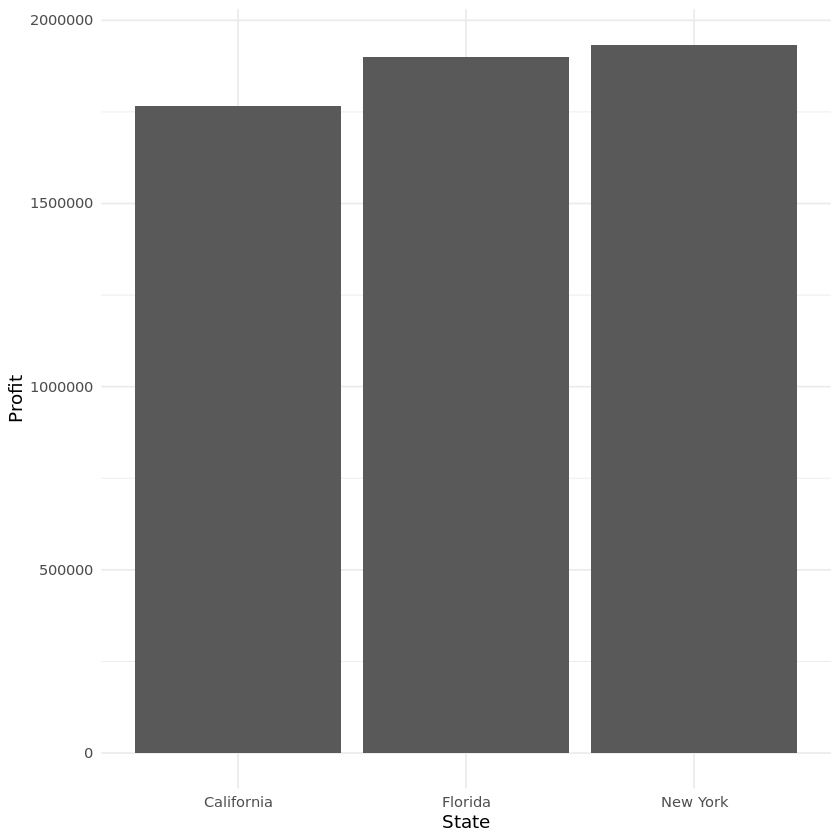

In [ ]:
p<-ggplot(MyData, aes(x=State, y=Profit)) +
  geom_bar(stat="identity")+theme_minimal()
p

In [ ]:
#Salvando

png("myplot_R.png")
print(p)
dev.off()

png 
  2

# Treinando um modelo simples

In [ ]:
head(sample3[,colunas])

Capacidade_de_Pagamento_7,tempo_desde_primeiro_contrato,tempo_desde_ultimo_contrato,QTD_OUTROS,VrFinanciamento
<int>,<dbl>,<dbl>,<int>,<dbl>
4,1267,251,0,-0.3236627
4,1797,236,0,0.8825137
4,268,18,0,-0.3854051
8,422,323,0,-0.7070450
8,5073,252,0,1.0351860
8,301,164,0,0.9617166


In [ ]:
library(dplyr)

In [ ]:
#regressao logistica

colunas = c('Capacidade_de_Pagamento_7','tempo_desde_primeiro_contrato','tempo_desde_ultimo_contrato','QTD_OUTROS','VrFinanciamento', 'fl_renovou')

modelo1 <- glm(fl_renovou ~ ., data = sample3[,colunas],family = binomial(link = "logit"))

In [ ]:
modelo1


Call:  glm(formula = fl_renovou ~ ., family = binomial(link = "logit"), 
    data = sample3[, colunas])

Coefficients:
                  (Intercept)      Capacidade_de_Pagamento_7  
                   -2.893e+00                     -3.502e-02  
tempo_desde_primeiro_contrato    tempo_desde_ultimo_contrato  
                    3.278e-05                     -1.723e-03  
                   QTD_OUTROS                VrFinanciamento  
                   -2.456e-01                      1.546e-01  

Degrees of Freedom: 49998 Total (i.e. Null);  49993 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    14090 
Residual Deviance: 14020 	AIC: 14040

In [ ]:
summary(modelo1)


Call:
glm(formula = fl_renovou ~ ., family = binomial(link = "logit"), 
    data = sample3[, colunas])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3956  -0.2686  -0.2493  -0.2321   2.8435  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -2.893e+00  1.428e-01 -20.252  < 2e-16 ***
Capacidade_de_Pagamento_7     -3.502e-02  1.622e-02  -2.159   0.0309 *  
tempo_desde_primeiro_contrato  3.278e-05  1.412e-05   2.322   0.0202 *  
tempo_desde_ultimo_contrato   -1.723e-03  3.534e-04  -4.876 1.08e-06 ***
QTD_OUTROS                    -2.456e-01  2.546e-01  -0.965   0.3347    
VrFinanciamento                1.546e-01  2.591e-02   5.967 2.41e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 14094  on 49998  degrees of freedom
Residual deviance: 14025  on 49993  degrees of freedom
  (1 observation del

# Visualizando os resultados dados
Nesse exemplo, fazendo a matriz de correlacao

In [ ]:

predito <- predict(modelo1, sample3, type="response")

#considerando o corte em .03
predito2 <- ifelse(predito>.03,1,0)

#create confusion matrix
table(sample3$fl_renovou, predito2)



   predito2
        0     1
  0 21513 26896
  1   592   998